<a href="https://colab.research.google.com/github/Jahid5550/dataprocessing/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np

IMPORTING DATASET

In [ ]:
dataset = pd.read_csv("salary_dataset.csv")

dataset['Sex'] = dataset['Sex'].map({'Male': 1, 'Female': 0})

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,Age,Sex,Education Level,Job_Name,Years of Experience,Salary(Taka)/month
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0


In [ ]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]]


In [ ]:
print(y)

[ 90000.  65000. 150000. ...  80000.  80000.  80000.]


HANDLING MISSING VALUES (NUMERIC)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, [0,4]])

x[:, [0,4]] = imputer.transform(x[:, [0,4]])

In [ ]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


HANDLING MISSING VALUES (TEXT)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x[:, [2,3]])

x[:, [2,3]] = imputer.transform(x[:, [2,3]])


In [ ]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


HANDLING MISSING VALUES OF SALARY

In [ ]:
# Assuming 'y' is a Pandas Series or a NumPy array
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# Impute missing values with 0
y = y.fillna(0)

# Check if 'x' and 'y' have the same length
print(len(x))
print(len(y))

# Convert 'y' back to a NumPy array if necessary
y = np.array(y)

7399
7399


In [ ]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), [2,3])],
    remainder='passthrough'
)

x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 ... 32.0 1.0 5.0]
 [0.0 0.0 0.0 ... 28.0 0.0 3.0]
 [0.0 0.0 0.0 ... 45.0 1.0 15.0]
 ...
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]]


OBSERVING OUTLIERS

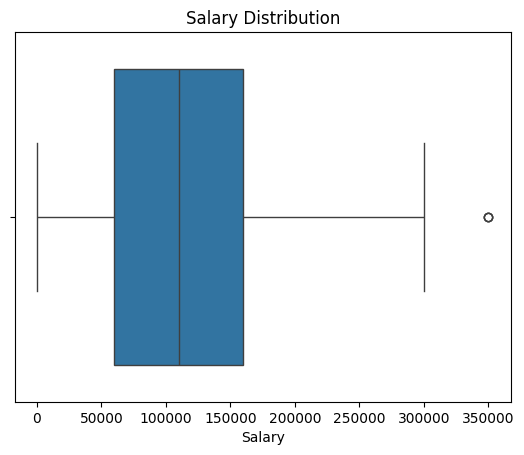

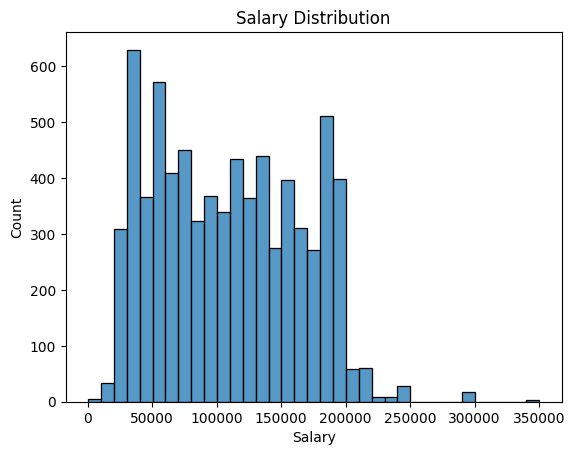

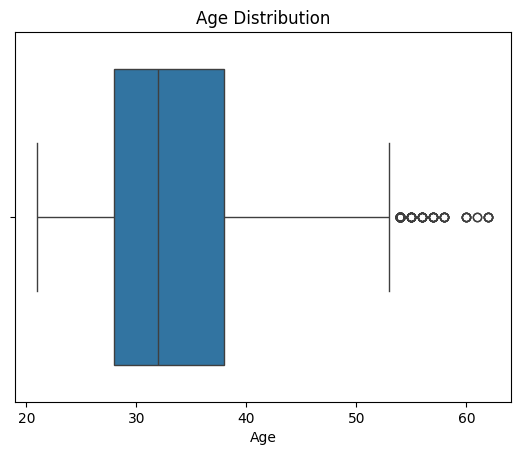

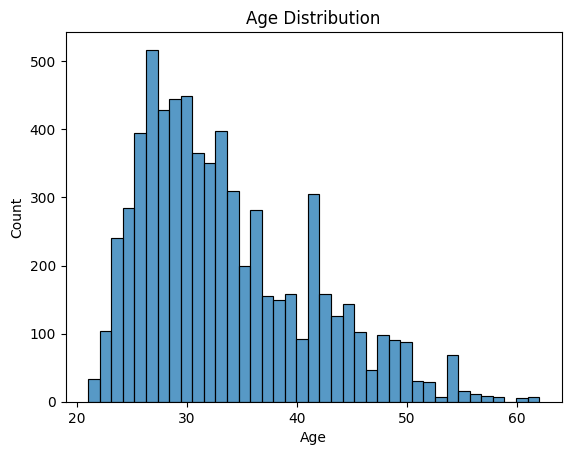

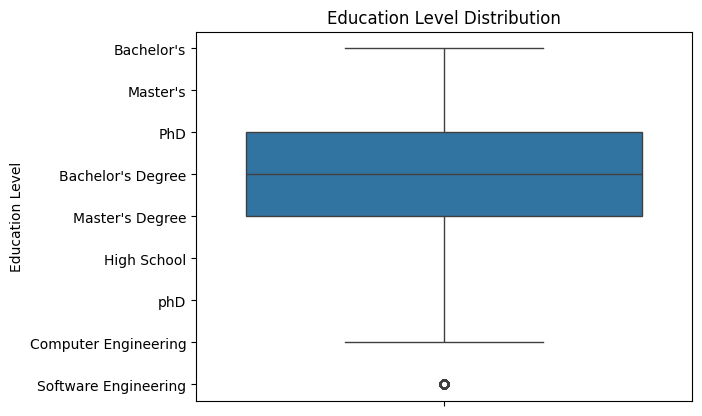

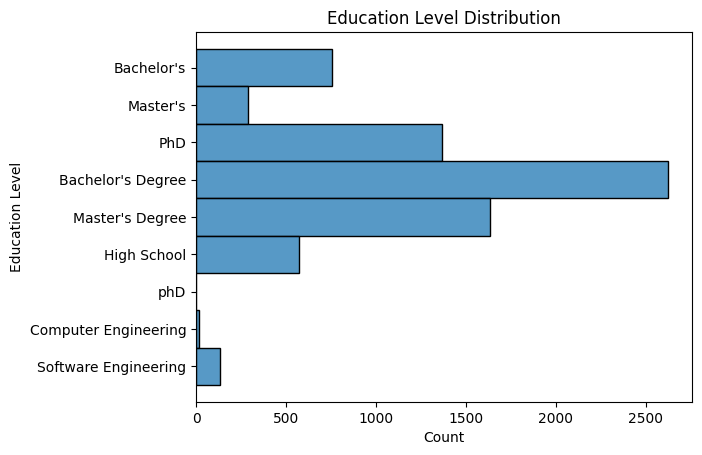

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataset['Salary(Taka)/month'])
plt.xlabel("Salary")
plt.title("Salary Distribution")
plt.show()

sns.histplot(x=dataset['Salary(Taka)/month'])
plt.xlabel("Salary")
plt.title("Salary Distribution")
plt.show()


sns.boxplot(x=dataset['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

sns.histplot(x=dataset['Age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

sns.boxplot(y=dataset['Education Level'])
plt.ylabel('Education Level')
plt.title("Education Level Distribution")
plt.show()

sns.histplot(y=dataset['Education Level'])
plt.ylabel('Education Level')
plt.title("Education Level Distribution")
plt.show()

SPLITTING DATASET INTO TRAINING AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

AS OF NOW, WE ARE SELECTING **LINEAR REGRESSION MODEL** AT OUR STARTING POINT.
THEN WE WILL DO WITH RANDOM FOREST



Mean Squared Error: 45475570.06199677
The accuracy of our model is 99.0%


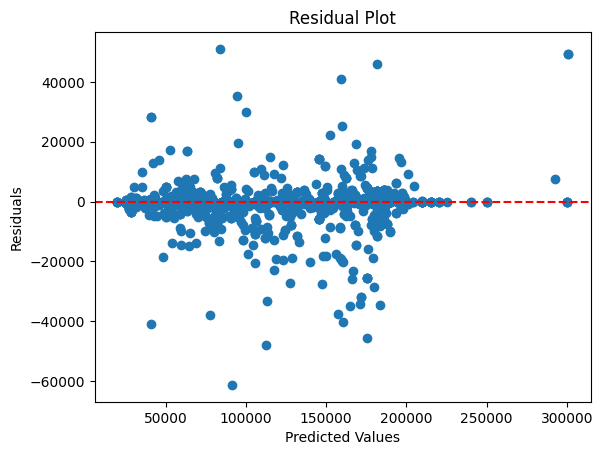

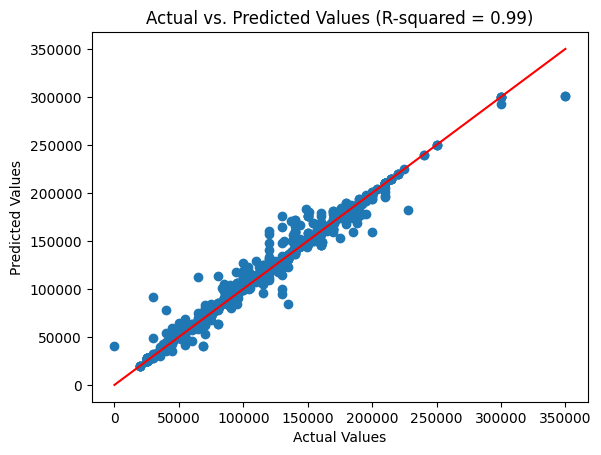

In [ ]:
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler




imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)




# # 4. Create and train the Linear Regression model
# model = LinearRegression()
# model.fit(x_train, y_train)

# # 5. Make predictions on the test set
# y_pred = model.predict(x_test)

# # 6. Evaluate the model
# mse = mean_squared_error(y_test, y_pred)


# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(x_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)

print("The accuracy of our model is {}%".format(round(r2, 2) *100))


# # 7. (Optional) Print the model's coefficients
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create residual plot
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (R-squared = {:.2f})".format(r2))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')  # Diagonal line
plt.show()
